# 2. Descriptive Analysis

# The outliers....

![title](Outlier.jpg)

The outlier has a value that is far from the bulk of the data (can go on either direction).

These outliers are highly damaging as they can drive a particular analysis one way or the other

![title](bad_outlier.gif)

In Multivariate analysis such as PCA (which we will cover soon) outliers tend to dominate the first main components, thus in some circumstances driving opposite conclusions.

However, outliers can have a substantial analytical model, it can point to interesting behaviors of the data, be of biological relevance or illustrate relevant flaws with a particular design. 

### !!!Do Not Remove Outliers Before Investigating What do they Represent!!!

## How to detect outliers!!
Graphical means of detecting outliers work the best, let's look at boxplots

### Boxplots

The boxplot identifies the center of the data (median) and the spread (either variance or standard deviation or the 25% - 75% quartiles. beyond the box the lines going up and down from the center of the box represent 1.5 times the spread. Points or circles beyond these lines represent observations that occur past all these spread measurements.



#### Let's look at an example.

This dataset was used on a study conducted by Cruikshanks et al 2006, the main goal was to identify acid-sensitive water in coastal rives in Ireland. Using pH as a function of SDI (Sodium Dominance Index), the altitude of the site and the presence of absence of forest. Let's look at the boxplot

In [4]:
install.packages("car")
IrishpH <- read.table(file = "IrishPh.txt",
                      header = TRUE)

package 'car' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Jordan\AppData\Local\Temp\RtmpElaxsR\downloaded_packages


In [ ]:
str(IrishpH)

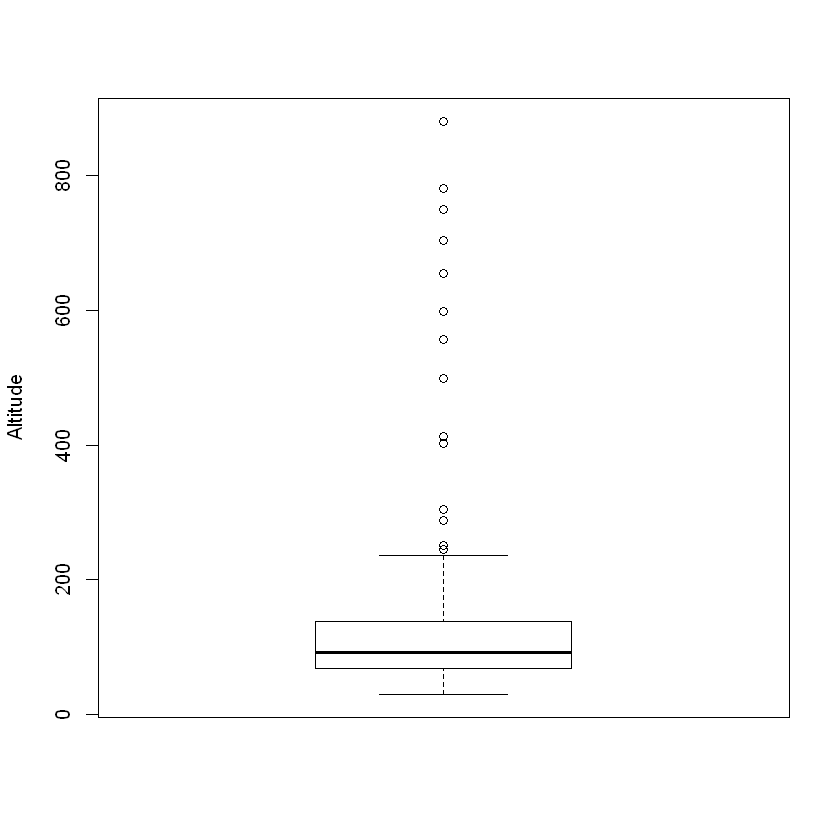

In [6]:
# library(car)
# par(mar = c(5,5,2,2), cex.lab = 1.5)
#Boxplot(IrishpH$Altitude, ylab = "Altitude")
#stripchart(IrishpH$Altitude, 
#           vertical = TRUE, method = "jitter", 
#           pch = 21,add = TRUE,col=rgb(1, 0, 0,0.5)) 
boxplot(IrishpH$Altitude, ylab = "Altitude") # base R

In [ ]:
#install.packages(skimr)
library(skimr)

In [ ]:
skim(IrishpH)

In [ ]:
library(mosaic)
favstats(IrishpH$Altitude)

We can also look at all of the variables in our model which will be part of the analysis, to have a good idea of how they will behave. Let’s use another data set, in this case we will use  data use by Ligas (2008). In their study they look at the effect of month and sex on cephalothorax length of the red swamp crayfish *Procambarus clarkii*. They use multiple variables to test their model (weight, sex, month, and sexual maturity of 746 crayfish individuals).

We can construct a **conditional boxplot** that evaluates the change of thorax length at different months.

In [9]:
Crayfish <- read.table(file = "Procambarus.txt",
                         header = TRUE)

In [ ]:
head(Crayfish)

In [ ]:
str(Crayfish)
#skim(Crayfish)

In [ ]:
library(car)
Boxplot(CTL ~ Month,
        ylab = "Cephalothorax Length",
        xlab = "Month", 
        data= Crayfish,
        main = expression(italic("Procambarus clarkii")))

stripchart(CTL ~ Month,data = Crayfish, 
           vertical = TRUE, method = "jitter", 
           pch = 21, 
           add = TRUE,col=rgb(1, 0, 0,0.5)) 

let’s stop for a moment here and review an important extra piece of information that these boxplots also gives us. 

When we are comparing multiple variables in a parametric statistical test (where normality is assumed), one of the main conditions to be able to compare across variables is that there is **homogeneity of variance (called homoscedasticity)**. This happens when the spread of all values of the population is the same for every value of the covariate. 

For example: looking at the Crayfish conditional box plot, we see that most of the classes of our variable have a similar patterns of spread, except for the second class (Mar_05) where the variance is much smaller and seems skewed. One quick read to the points spread seems to illustrate that there is low sampling that can be skewing the distribution.

There are multiple statistical tests that allows us to test for homogeneity of variances, such as the Bartlett test, the F-ratio test, and the Levene’s test among others.

#### Another useful visualization technique is the violin plot. It is similar to a box plot with a rotated kernel density plot.

Continuing with the Irish water quality dataset, lets construct violong plots to the same data we evaluated before

Warning message:
"Removed 338 rows containing non-finite values (stat_boxplot)."Warning message:
"Removed 338 rows containing non-finite values (stat_ydensity)."Warning message:
"Removed 338 rows containing missing values (geom_point)."

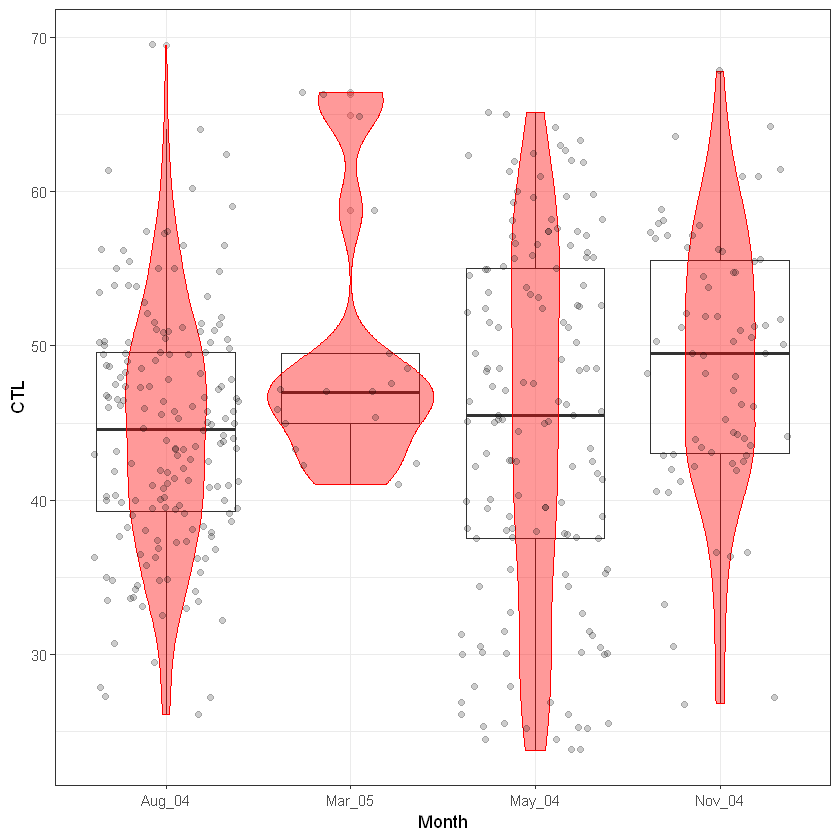

In [10]:
library(ggplot2)
ggplot(data = Crayfish, aes(x = Month, y = CTL)) +
  geom_boxplot(alpha = 0.2) +
  geom_violin(fill='red', color='red',  alpha=0.4) +
  geom_jitter(alpha = 0.2, color = "black") + 
  theme_bw()

It is important to note here that there are a lot of missing values. Missing values can also have an effect on the behavior of the data and our results.

We need to understand if the missing values that we have have a biological basis, an artifact of the sampling, or simply clerical errors.

We can count the number of missing values with the function is.na in R.

How can we deal with zeros in the data??

In [ ]:
sum(is.na(Crayfish$CTL))

In [ ]:
median(Crayfish$CTL, na.rm=T)
mean(Crayfish$CTL, na.rm=T)

## Cleveland dotplots

Another interesting way of looking at the data is using dotplots, which basically we plot the row number of an observation vs the observed value, the y-axis shows how the data is ordered and the x-axis shows the values.

Let’s look at the Irish pH dataset again

In [ ]:
par(mar = c(5,5,2,2), cex.lab = 1.5, cex.main = 1.5)
dotchart(IrishpH$Altitude,
         main = "Altitude",
         ylab = "Order of the data",
         xlab = "Range of the data")
           

In [ ]:
head(IrishpH)

In [ ]:
ggplot(IrishpH, aes(ID,Altitude)) +
  geom_point(stat = "identity") +
  geom_text(data=subset(IrishpH, Altitude > 400),
            aes(ID,Altitude,label=Altitude),hjust = 2)+
  coord_flip()

### What to do if you suspect that there are outliers in your data?

1. If you are sure they are outliers, remove them
2. Run the models with and without the outliers, present this data with analysis.
3. Apply a transformation

### Transformations

Transformations change the dispersion of the data. As the transformation is applied to all elements from the data, there is no problem with biasing the data. 

There are multiple types of transformation (see here for a complete review [https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3043340/](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3043340/)
The three most used are logarithmic, square root, and reciprocal.

In [ ]:
bimodalData_s = read.csv(file = "plant_heights.csv",header = T)
str(bimodalData_s)

range(bimodalData_s$x)
bimodalData_s$log = log(bimodalData_s$x)
bimodalData_s$log10 = log(bimodalData_s$x,10)

In [ ]:
plot(bimodalData_s$x,seq(1:10000))

In [ ]:
d= density(bimodalData_s$x)
par(mfrow = c(1,3))
hist(bimodalData_s$x)
plot(d)

qqnorm(bimodalData_s$x)

In [ ]:
#plot(bimodalData_s$log10,seq(1:10000))
par(mfrow = c(1,3))
hist(bimodalData_s$log)

d= density(bimodalData_s$log10)
plot(d)

qqnorm(bimodalData_s$log10)

## Histograms

As we have seen previously, histograms are useful when we want to check for normality (which is important if we want to apply some statistical tests). The histogram aims to show the center and distribution of the data

In [ ]:
x = round(rnorm(1000,0,1),1)

In [ ]:
#table(x)
hist(x)

In [ ]:
hist(x, breaks = 40)
hist(x, breaks = 400) ##but we loose resolution

In [ ]:
# Lets run another example using the sparrows dataset and select one 
# species. Lets plot the histogram of weights

Sparrows = read.table(file = "Sparrows.txt", header = TRUE)
str(Sparrows)

In [ ]:
Sparrows2 = Sparrows[Sparrows$Species == "SSTS",]
hist(Sparrows2$Wt, xlab = "Weight in grams", main = expression(italic("Ammodramus caudacutus")))

In [ ]:
hist(log(Sparrows2$Wt,10), xlab = "Weight in grams", main = expression(italic("Ammodramus caudacutus")))

### We can also draw multiple histograms using the lattice package

In [ ]:
library(lattice)
histogram(~Wt|factor(Observer),
         data = Sparrows2,
         layout = c(1,7),
         nint = 30,
         xlab = "Weight in grams",
         strip = FALSE,
         strip.left = TRUE,
         ylab = "Frequencies")

Measures of Location

Arithmetic mean: 

In [ ]:
x = c(2,2,2,1,3,1,3,2,1,4,3,2,3,4,30)

In [ ]:
mean(x)
hist(x)

In [ ]:
a = c(3.85,5.21,4.7)
n = c(12,25,8)

#weighted mean = sum product (mean*n) / sum(n)

y= ((12*3.85) + (25*5.21) + (8*4.70)) / (12+25+8)
y
mean(a)

In [ ]:
x = c(2,2,2,1,3,1,3,2,1,4,3,2,3,4,30)
median(x)
sorted_x = (1,1,1,2,2,2,2,2,3,3,3,3,4,4,30)
1 .sort observations from smallest to largest
2 if odd n+1/2th

3 if n is even then calculate the average n/2th and n+1/2th

Geometric Mean:


In [ ]:
a = c(2069, 2581, 2759, 2834, 2838, 2841, 3031, 3101, 3200, 3245, 3248, 3260, 3265,
3314, 3323, 3484, 3541, 3609, 3649, 4146)
plot(density(a))
mean(a)
median(a)

In [ ]:
getmode <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}

getmode(x)
getmode(a)

In [ ]:
GMy = antilog * 1/n sum log y

GMy = root of the product of Yn

gm_mean = function(x, na.rm=TRUE){
  exp(sum(log(x[x > 0]), na.rm=na.rm) / length(x))
}


In [ ]:
gm_mean(a)

In [ ]:
Measures of spread

range: diff between the largest and smallest observation in a sample

Quantiles: fraction point estimate that specifies the range of a probability distribution or obserbations in a sample 
in equal proportions
Quantiles: 4 groups
Decile: 10 groups
percentiles:100 groups

Interquantile range (IQR) - area under the curve or differce between 75th and 25 th

In [ ]:
quan = c(1,3,5,6,9,11,12,13,19,21,22,32,35,36,45,44,55,
   68,79,80,81,88,90,91,92,100,112,113,114,120,121,132,145,146,149,150,155,180,189,190)


In [ ]:
quantile(quan,probs = c(0.25,0.75))

In [ ]:
variance and the standard deviation: 